## Dataset

1. We use the Bank Marketing Dataset from the UCI Machine Learning Repository.
Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

2. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Originally designed for supervised learning, but we will ignore the label initially

Important Decision:

Even though the dataset contains subscribed (whether the client subscribed to a term deposit), we do not use it to train the clustering model.
We may, however, use it later for interpretation only.

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [18]:
#pip install matplotlib
#!pip install matplotlib seaborn
!pip install scikit-learn

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     -------------------------------------- 61.0/61.0 kB 817.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.1 MB 2.6 MB/s eta 0:00:04
   - -------------------------------------- 0.3/8.1 MB 4.0 MB/s eta 0:00:02
   -- ------------------------------------- 0.4/8.1 MB 3.8 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.1 MB 2.8 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/8.1 MB 2.7 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/8.1 MB 3.1 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/8.1 MB 3.0 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/8.1 MB 2.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.2/8.1 MB 3.2 MB/s eta 0:00:03
   ------ ------------


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: C:\Users\Qebaa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## task 1

### Requirements

The goal of this lab is to **explore the bank dataset, prepare it for clustering, and apply K-Means**.  
Follow these steps carefully and write down your observations.  

### **Exploratory Data Analysis (EDA)** (understanding the dataset and its characteristics)

For each feature, you should:

- Identify **numeric vs categorical features**  
- Check **distributions** of numeric features (min, max, mean, std, skewness)  
- Check **counts of categories** for categorical features  
- Identify **missing or unknown values** and decide how to handle them  
- Look for **correlations** between numeric features  
- Identify **outliers** that may affect clustering  

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bank.csv', sep=';')

In [7]:
# First 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
# Identify numeric and categorical features
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   str  
 2   marital    4521 non-null   str  
 3   education  4521 non-null   str  
 4   default    4521 non-null   str  
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   str  
 7   loan       4521 non-null   str  
 8   contact    4521 non-null   str  
 9   day        4521 non-null   int64
 10  month      4521 non-null   str  
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   str  
 16  y          4521 non-null   str  
dtypes: int64(7), str(10)
memory usage: 600.6 KB


In [9]:
# Check min, max, mean, std of numeric features
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


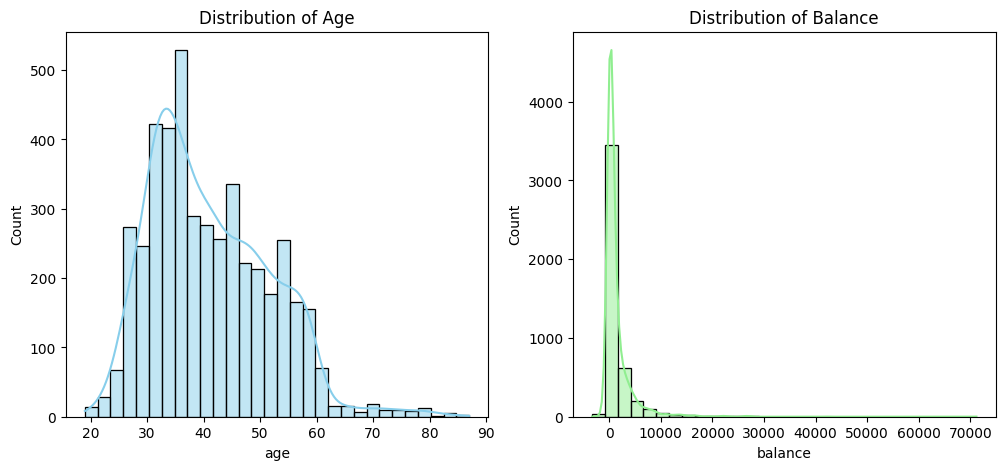

In [10]:
# We only want to look at the numerical features that actually tell us about the customer
meaningful_numeric_cols = ['age', 'balance']


# a figure to hold our charts
plt.figure(figsize=(12, 5))

# Distribution of Age
plt.subplot(1, 2, 1) # (1 row, 2 columns, 1st chart)
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age')

# Distribution of Balance
plt.subplot(1, 2, 2)
sns.histplot(df['balance'], kde=True, bins=30, color='lightgreen')
plt.title('Distribution of Balance')
plt.show()

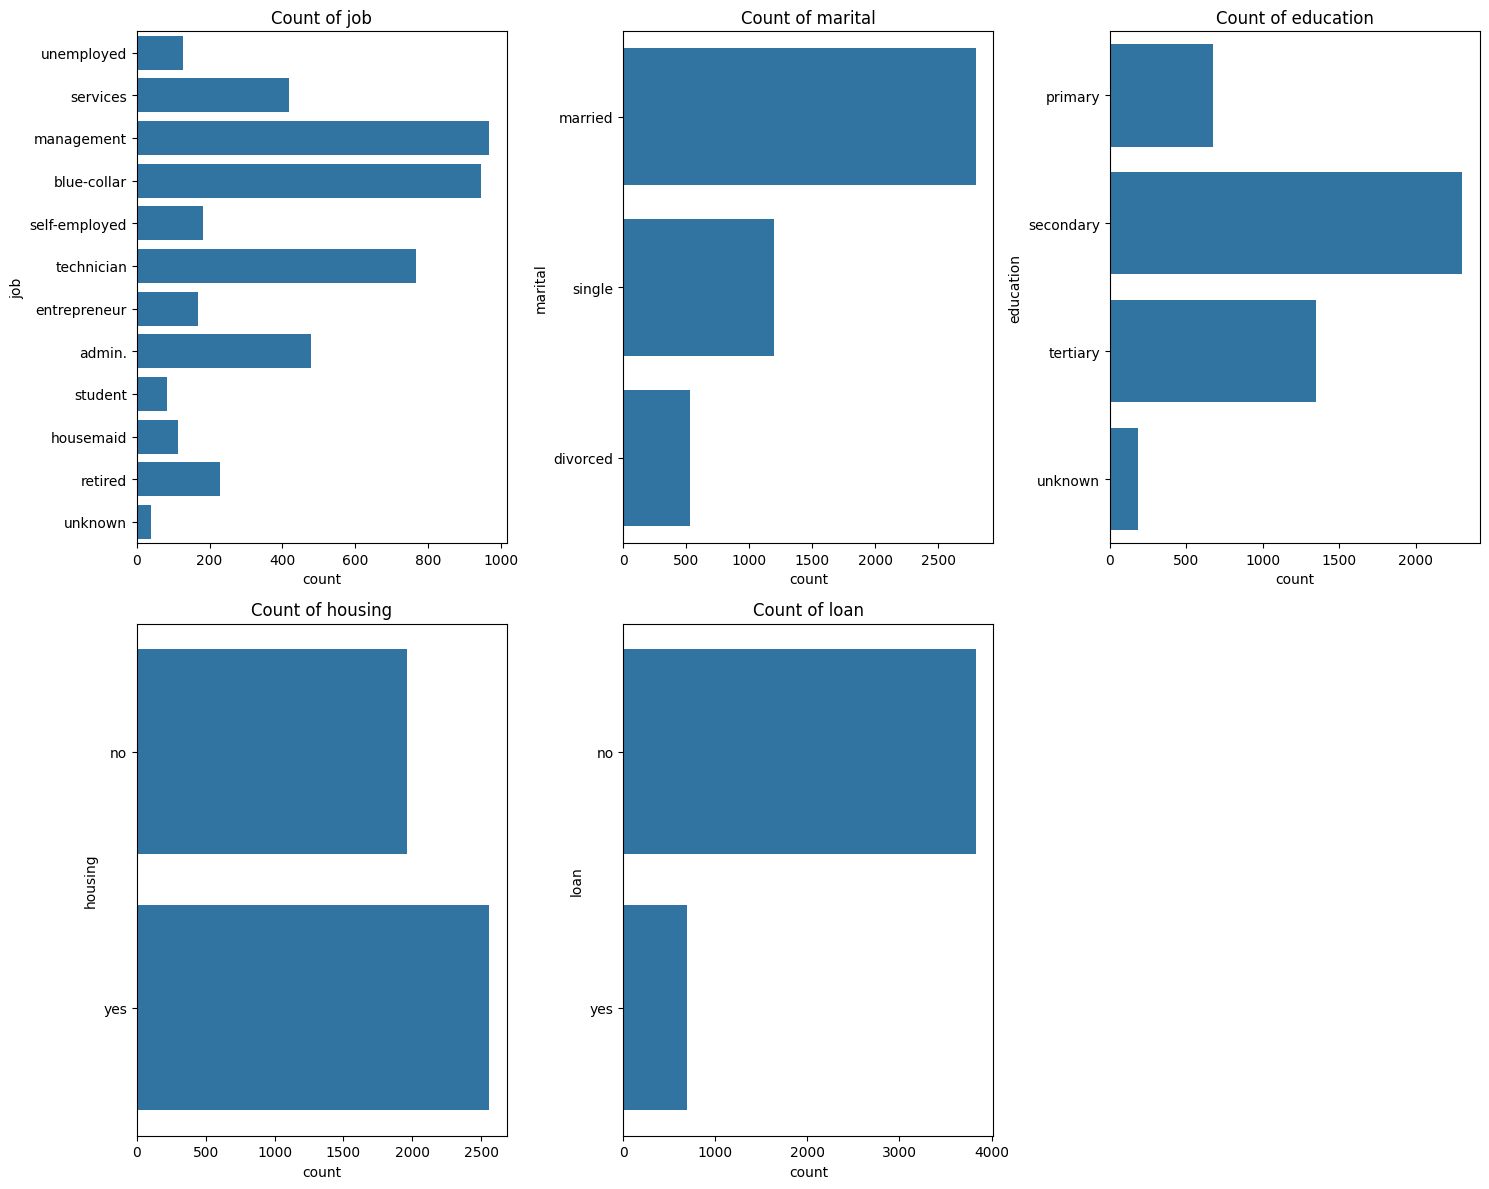

In [11]:
meaningful_categorical_cols = ['job', 'marital', 'education', 'housing', 'loan']

plt.figure(figsize=(15, 12))

# Loop through our chosen columns
for i in range(len(meaningful_categorical_cols)):
    col_name = meaningful_categorical_cols[i]
    
    # We create a grid with 2 rows and 3 columns to fit our 5 charts
    plt.subplot(2, 3, i + 1)
    
    sns.countplot(y=df[col_name])
    plt.title('Count of ' + col_name)

plt.tight_layout()
plt.show()

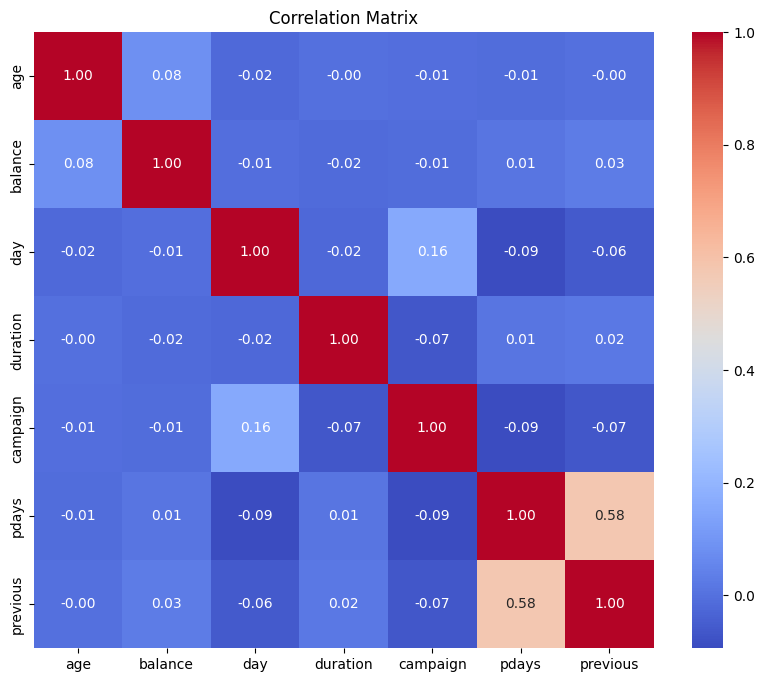

In [12]:
# Check for correlations between numeric features
numeric_cols=['age', 'balance','day','duration','campaign','pdays','previous']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

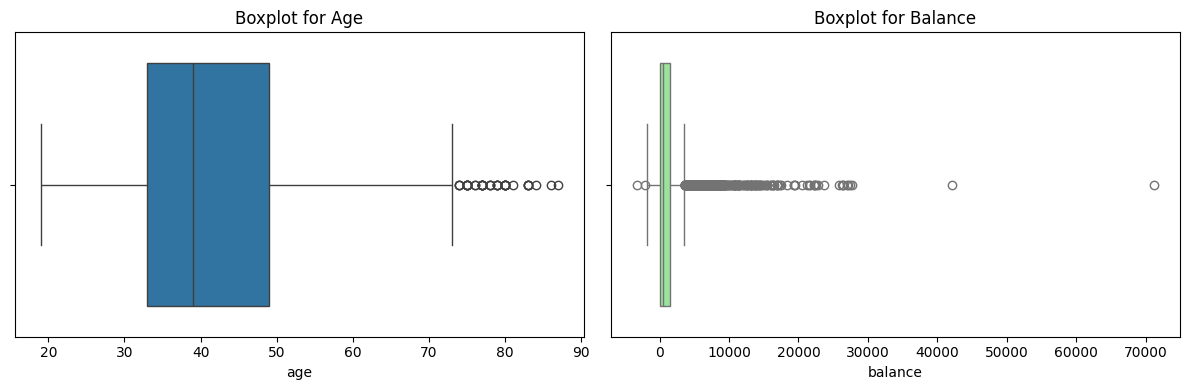

In [13]:
plt.figure(figsize=(12, 4))

# boxplot is for the Age column
plt.subplot(1, 2, 1) # (1 row, 2 columns, 1st chart)
sns.boxplot(x=df['age'])
plt.title('Boxplot for Age')

# boxplot is for the Balance column
plt.subplot(1, 2, 2) # (1 row, 2 columns, 2nd chart)
sns.boxplot(x=df['balance'], color='lightgreen')
plt.title('Boxplot for Balance')

plt.tight_layout()
plt.show()

### **Data Preparation**

Before applying K-Means:

- Drop irrelevant or target columns
- Encode categorical features into numeric format
- Scale numeric features so all are comparable for distance calculations  
- Check that the final dataset has **no missing values** and **all features are numeric**  

In [14]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   str  
 2   marital    4521 non-null   str  
 3   education  4521 non-null   str  
 4   default    4521 non-null   str  
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   str  
 7   loan       4521 non-null   str  
 8   contact    4521 non-null   str  
 9   day        4521 non-null   int64
 10  month      4521 non-null   str  
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   str  
 16  y          4521 non-null   str  
dtypes: int64(7), str(10)
memory usage: 600.6 KB


In [19]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop columns we do not need for clustering
columns_to_drop = ['y', 'contact', 'day', 'month', 'duration', 'pdays', 'previous', 'campaign', 'contact']
df_cluster = df.drop(columns=columns_to_drop)

print(df_cluster.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'poutcome']


In [20]:
# Convert text columns to numbers (Encoding)
text_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

encoder = LabelEncoder()

for col in text_columns:
    df_cluster[col] = encoder.fit_transform(df_cluster[col])

display(df_cluster.head())

,age,job,marital,education,default,balance,housing,loan,poutcome
0,30,10,1,0,0,1787,0,0,3
1,33,7,1,1,0,4789,1,1,0
2,35,4,2,2,0,1350,1,0,0
3,30,4,1,2,0,1476,1,1,3
4,59,1,1,1,0,0,1,0,3


In [21]:
# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

df_scaled = pd.DataFrame(X_scaled, columns=df_cluster.columns)

df_scaled.head()

,age,job,marital,education,default,balance,housing,loan,poutcome
0,-1.056270,1.716804,-0.246429,-1.644755,-0.130759,0.121072,-1.142051,-0.424756,0.444413
1,-0.772583,0.795246,-0.246429,-0.309038,-0.130759,1.118644,0.875617,2.354292,-2.579961
2,-0.583458,-0.126313,1.421396,1.026680,-0.130759,-0.024144,0.875617,-0.424756,-2.579961
3,-1.056270,-0.126313,-0.246429,1.026680,-0.130759,0.017726,0.875617,2.354292,0.444413
4,1.686036,-1.047871,-0.246429,-0.309038,-0.130759,-0.472753,0.875617,-0.424756,0.444413


In [22]:
# Check for missing values one last time
df_scaled.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
poutcome     0
dtype: int64

In [23]:
df_scaled.dtypes

age          float64
job          float64
marital      float64
education    float64
default      float64
balance      float64
housing      float64
loan         float64
poutcome     float64
dtype: object

### **Apply K-Means Clustering**

- Decide an initial number of clusters (K)  
- Fit the K-Means model to your prepared dataset  
- Assign each data point to a cluster

In [24]:
from sklearn.cluster import KMeans

# Decide an initial K
k = 3

# Fit the model
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(df_scaled)

# Add labels to our dataframe
df['Cluster_K3'] = kmeans.labels_

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Cluster_K3
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,2
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,2
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


In [25]:
# Analyze the characteristics of each cluster
print("Cluster Averages (Original Scale):")
display(df.groupby('Cluster_K3').mean(numeric_only=True))

Cluster Averages (Original Scale):


,age,balance,day,duration,campaign,pdays,previous
Cluster_K3,,,,,,,
0,48.670201,1652.855249,15.817073,264.378579,2.774125,34.522800,0.468717
1,40.890014,917.163531,15.820550,260.904486,2.918958,32.439942,0.454414
2,33.993313,1379.007716,16.044239,264.643004,2.768004,47.458333,0.645576


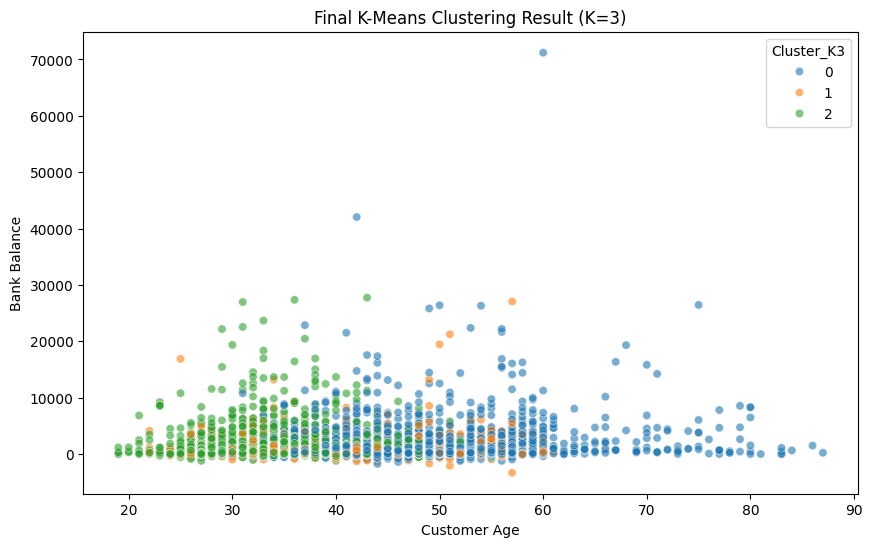

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='balance', hue='Cluster_K3', palette='tab10', alpha=0.6)
plt.title('Final K-Means Clustering Result (K=3)')
plt.xlabel('Customer Age')
plt.ylabel('Bank Balance')
plt.show()

### **Choosing the Convenient K**

- Use **Elbow Method**: plot Sum of Squared Distances (SSD) vs K  
- Identify the **elbow point** where SSD reduction slows  
- Calculate **Silhouette scores** to validate K  

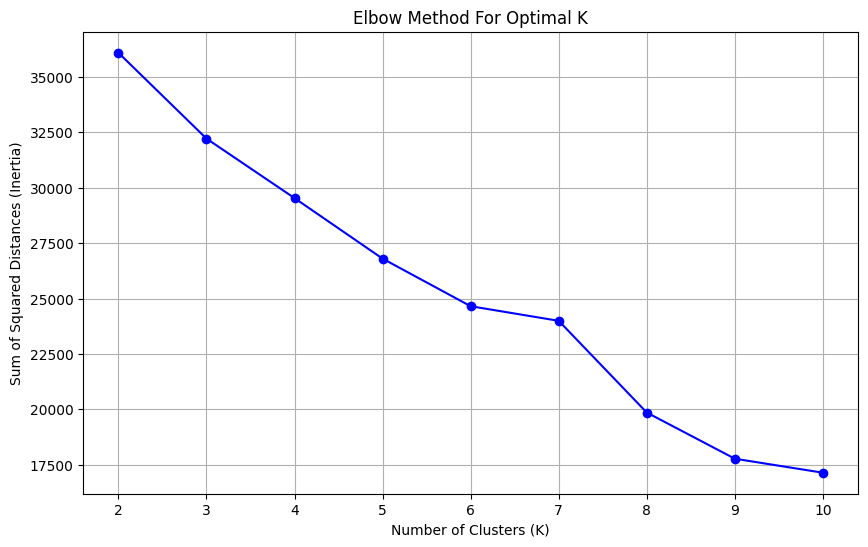

In [27]:
# Calculate SSD (Sum of Squared Distances) for K=2 to K=10
ssd = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(df_scaled)
    ssd.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, ssd, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

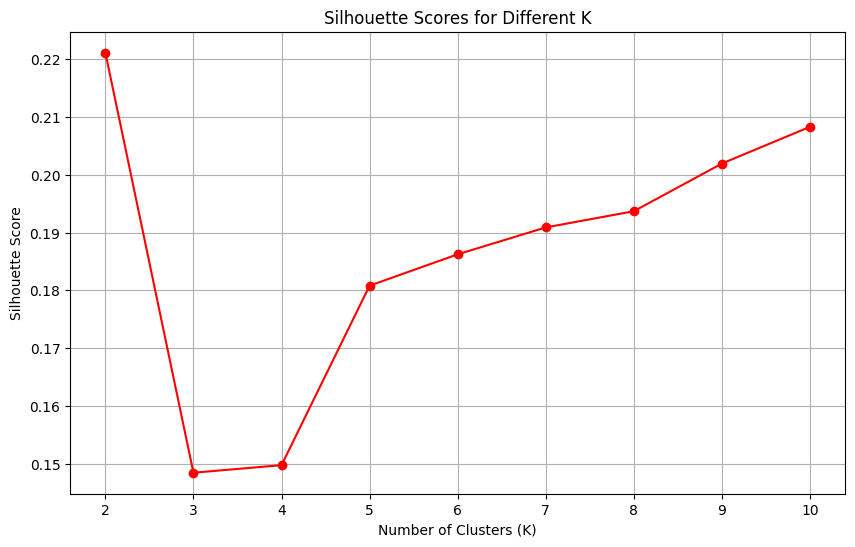

In [28]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K')
plt.grid(True)
plt.show()

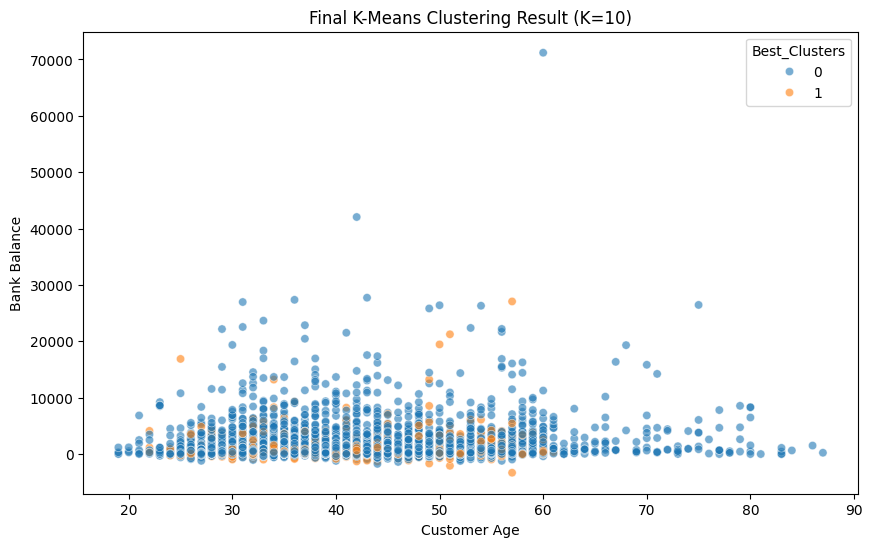

In [29]:
best_k = 2
final_model = KMeans(n_clusters=best_k, random_state=1)
final_model.fit(df_scaled)

df['Best_Clusters'] = final_model.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='balance', hue='Best_Clusters', palette='tab10', alpha=0.6)
plt.title(f'Final K-Means Clustering Result (K={k})')
plt.xlabel('Customer Age')
plt.ylabel('Bank Balance')
plt.show()

In [30]:
df.groupby('Best_Clusters')[meaningful_numeric_cols].mean()

,age,balance
Best_Clusters,,
0,41.220627,1513.857963
1,40.890014,917.163531
